# Trying to boost a category (concept)

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
model = keras.models.load_model(os.path.join('models', 'painter_model'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

In [3]:
dirname = "painters_ds"

In [4]:
wdf = pd.read_json('./data/' + dirname + ".json")
wdf.head(3)

,category,input,output
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Howardena_Pindell,[http://dbpedia.org/resource/United_States],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
http://dbpedia.org/resource/Étienne_Moreau-Nélaton,[http://dbpedia.org/resource/France],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1


In [6]:
dfs = []
for filename in os.listdir(os.path.join('visualizer_data', 'activations', dirname)):
    if filename.split('.')[-1] == 'pkl' and 'table_data' not in filename:
        dfs.append(pd.read_pickle(os.path.join('visualizer_data', 'activations', dirname, filename)))

In [67]:
layer_to_explore = 0
df = dfs[layer_to_explore]
print(f"Using layer {model.layers[layer_to_explore].name}")

Using layer embedding


In [68]:
df.head(1)

,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Alexander_Semionov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,1,0.547359,-0.328434,-0.172445,0.069439,-0.628683,1.294147,...,0.466627,0.293625,-0.208663,-0.316626,-0.006433,-0.412829,0.242208,0.072852,0.725296,-0.755482


In [69]:
df.iloc[0, 4:]

neuron_1     0.547359
neuron_2    -0.328434
neuron_3    -0.172445
neuron_4     0.069439
neuron_5    -0.628683
               ...   
neuron_60   -0.412829
neuron_61    0.242208
neuron_62    0.072852
neuron_63    0.725296
neuron_64   -0.755482
Name: http://dbpedia.org/resource/Alexander_Semionov, Length: 64, dtype: object

In [70]:
def plot_activ(df, df2=None, df3=None):
    
#     plt.figure(figsize=(15, 6))
#     sns.lineplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.lineplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()
    
#     plt.figure(figsize=(15, 6))
#     sns.scatterplot(x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
#     if df2 is not None:
#         sns.scatterplot(x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
#     plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Visualizing sample vs cat')
    
    sns.lineplot(ax=axes[0], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.lineplot(ax=axes[0], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[0].set_title('Line plot')
    
    
    sns.scatterplot(ax=axes[1], x=range(len(df.iloc[0, :])), y=df.iloc[0, :])
    if df2 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df2.iloc[0, :])), y=df2.iloc[0, :])
    if df3 is not None:
        sns.scatterplot(ax=axes[1], x=range(len(df3.iloc[0, :])), y=df3.iloc[0, :])
    axes[1].set_title('Scatter plot')
    
    fig.legend(['df1', 'df2', 'df3'])
    
    
def get_cat_df(df, cat):
    return df[df.category.apply(lambda x: cat in x)]

def get_mean_activations(df):
    df_act = df.iloc[:, 4:]
    return df_act.mean()

In [71]:
cat = 'http://dbpedia.org/resource/Russia'

In [72]:
df_cat = get_cat_df(df, cat)
df_mean_cat = get_mean_activations(df_cat)
df_mean_cat = pd.DataFrame(df_mean_cat).T
df_mean_cat

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


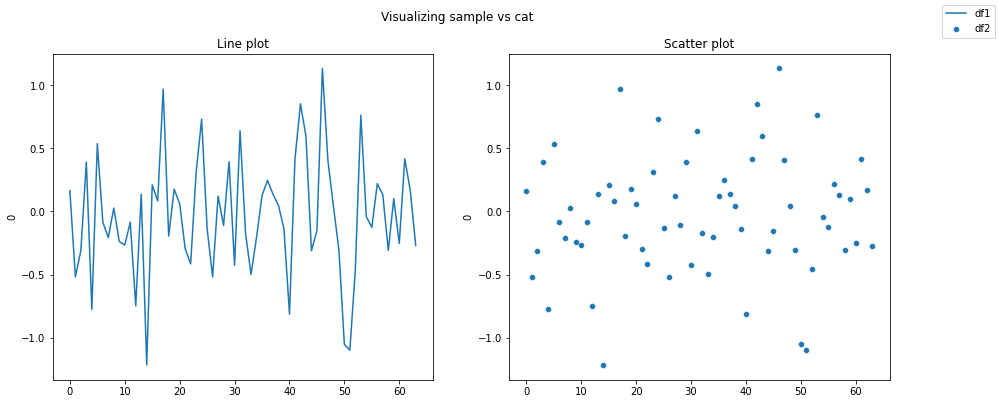

In [73]:
plot_activ(df_mean_cat)

In [74]:
def get_sample(df, cat=None):
    if cat is None:
        return df[df.pred != df.true].sample(n=1)
    else:
        return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)

In [75]:
cat

'http://dbpedia.org/resource/Russia'

In [76]:
sample = get_sample(df, 'http://dbpedia.org/resource/Russia')
sample

C:\Users\maxim\AppData\Local\Temp/ipykernel_1684/370248897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return get_cat_df(df, cat)[df.pred != df.true].sample(n=1)


,category,input,true,pred,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Pavel_Filonov,[http://dbpedia.org/resource/Russia],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,0.620903,0.390895,0.619284,-0.331203,0.035298,0.955105,...,0.615605,0.477533,-0.544936,-0.578458,0.387797,-0.518064,0.392987,-0.374186,0.688104,-0.699203


In [77]:
activations_cols = [x for x in sample.columns if "neuron" in x]
df_act_sample = sample.loc[:, activations_cols]
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Pavel_Filonov,0.620903,0.390895,0.619284,-0.331203,0.035298,0.955105,-0.598741,0.475003,-0.521428,-0.667169,...,0.615605,0.477533,-0.544936,-0.578458,0.387797,-0.518064,0.392987,-0.374186,0.688104,-0.699203


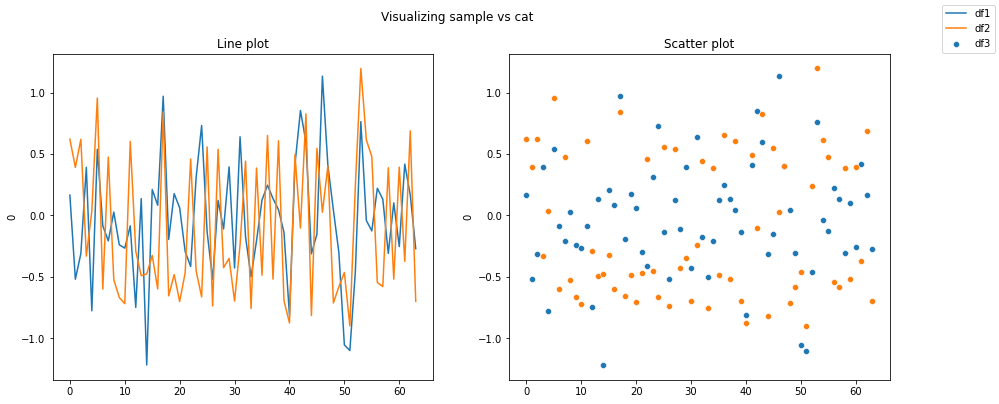

In [78]:
plot_activ(df_mean_cat, df_act_sample)

In [79]:
def get_diffs(df, sample_df):
    return sample_df.reset_index().drop(columns=['index']) - df

In [80]:
diffs = get_diffs(df_mean_cat, df_act_sample)
diffs

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.455565,0.909918,0.929289,-0.722211,0.811082,0.417699,-0.514351,0.682043,-0.548757,-0.428788,...,0.65638,0.603391,-0.765681,-0.711303,0.696282,-0.620366,0.646193,-0.791852,0.52089,-0.429084


In [81]:
avg_diff = abs(diffs).sum().sum()/len(diffs.iloc[0, :])
print(f"Average difference is: {avg_diff}")

Average difference is: 0.5722205638885498


### Re-adjust activations

On rapproche les activations du sample vers les activations de la catégorie cible d'un facteur 10% sur les neurones dont la différence est significative (i.e. pvalue < 0.01).

On a alors besoin de 3 éléments:
* le dataframe des activations du sample
* le dataframe des activations moyennes de la catégorie cible
* le dataframe des pvalues de la catégorie cible (avec maybe l'information sur la significativité de la pvalue, ici fixée à <= 0.01)

In [82]:
russia_pv = pd.read_pickle('src/russia-pv.pkl')
dfrpv = pd.DataFrame(russia_pv, columns=['pvalue'])
dfrpv

,pvalue
0,1.587716e-01
1,4.878287e-09
2,6.452485e-05
3,1.579483e-06
4,1.897656e-13
...,...
59,4.158541e-02
60,3.111701e-04
61,1.502952e-06
62,9.974529e-02


In [83]:
dfrpv['sign'] = dfrpv['pvalue'] <= 0.01
print(dfrpv[dfrpv['sign'] == True].shape)
print(dfrpv[dfrpv['sign'] == True])

(42, 2)
          pvalue  sign
1   4.878287e-09  True
2   6.452485e-05  True
3   1.579483e-06  True
4   1.897656e-13  True
5   2.738027e-11  True
7   3.096681e-03  True
9   3.773218e-03  True
10  1.769776e-03  True
12  1.351876e-13  True
14  7.951155e-24  True
15  2.011291e-03  True
17  6.368204e-23  True
19  6.570767e-03  True
21  5.796425e-05  True
22  3.067940e-07  True
23  5.675254e-05  True
24  1.612688e-10  True
26  9.286252e-11  True
29  1.690230e-06  True
30  3.268496e-09  True
31  1.080565e-11  True
32  5.932947e-03  True
33  1.684570e-11  True
34  2.491615e-03  True
36  2.208312e-03  True
40  4.088773e-18  True
41  3.012649e-08  True
42  1.058638e-14  True
43  6.252875e-12  True
44  2.203407e-05  True
46  1.785589e-24  True
47  9.985386e-08  True
49  9.544518e-05  True
50  1.910548e-19  True
51  2.097827e-18  True
52  8.469099e-08  True
53  1.930613e-16  True
56  2.021712e-03  True
58  6.567423e-05  True
60  3.111701e-04  True
61  1.502952e-06  True
63  2.292984e-04  True


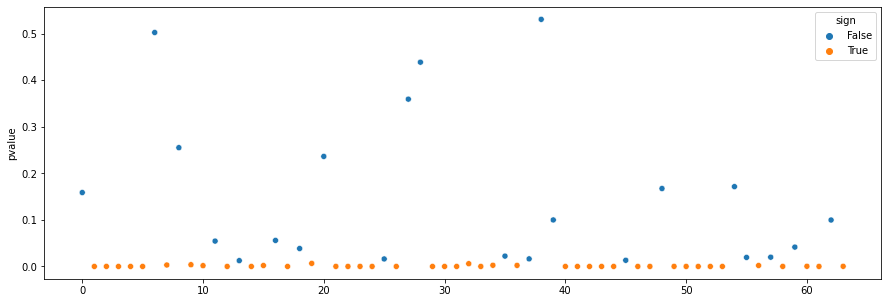

In [84]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=range(len(dfrpv['pvalue'])), y='pvalue', 
                hue='sign', data=dfrpv)
plt.show()

Pvalue dataframe with significant bool value (example for russia here)

In [85]:
dfrpv

,pvalue,sign
0,1.587716e-01,False
1,4.878287e-09,True
2,6.452485e-05,True
3,1.579483e-06,True
4,1.897656e-13,True
...,...,...
59,4.158541e-02,False
60,3.111701e-04,True
61,1.502952e-06,True
62,9.974529e-02,False


In [86]:
df_mean_cat # mean activations for a category (here russia)

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
0,0.165338,-0.519022,-0.310005,0.391009,-0.775784,0.537406,-0.08439,-0.20704,0.027329,-0.238381,...,-0.040775,-0.125858,0.220746,0.132845,-0.308484,0.102303,-0.253206,0.417666,0.167214,-0.270119


In [87]:
df_act_sample # activations for a misclassified sample of the category

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Pavel_Filonov,0.620903,0.390895,0.619284,-0.331203,0.035298,0.955105,-0.598741,0.475003,-0.521428,-0.667169,...,0.615605,0.477533,-0.544936,-0.578458,0.387797,-0.518064,0.392987,-0.374186,0.688104,-0.699203


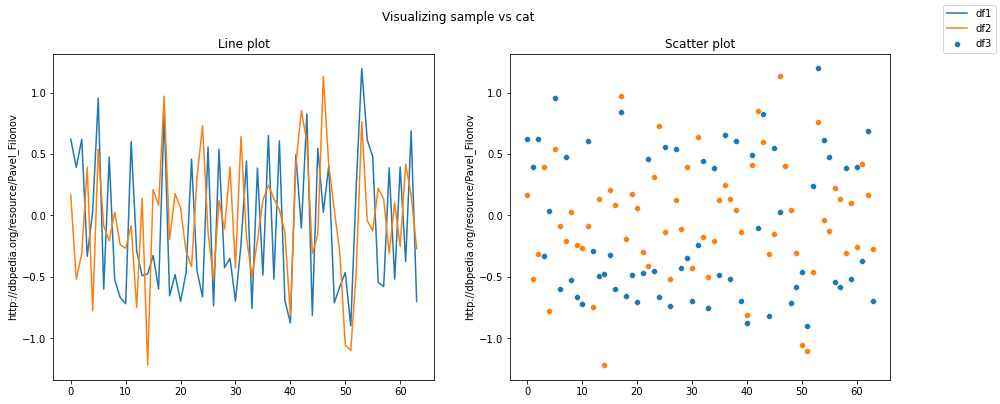

In [88]:
plot_activ(df=df_act_sample, df2=df_mean_cat)
# df in blue
# df2 in orange

In [89]:
dfrpv.set_index(df_act_sample.T.index, inplace=True)
dfrpv

,pvalue,sign
neuron_1,1.587716e-01,False
neuron_2,4.878287e-09,True
neuron_3,6.452485e-05,True
neuron_4,1.579483e-06,True
neuron_5,1.897656e-13,True
...,...,...
neuron_60,4.158541e-02,False
neuron_61,3.111701e-04,True
neuron_62,1.502952e-06,True
neuron_63,9.974529e-02,False


The formula for the new data point is : 

$$ s' = s - d * f $$

where $s'$ is the new value, $s$ is the activation value of the sample, $d$ is the difference between the sample activation and the mean activation (on the same neuron) and $f$ is the factor

In [90]:
def boost(sample, category, pvalue=None):
    """
    both of the 3 elements have the same shape
    pvalues might be reached directly from this function
    """
    
    factor = 0.1 # i.e. 10%
    
    # We built a proper dataset to process the data
    df = pd.concat([sample, category, pvalue]).T
    df.columns = [
        'sample', 'cat', 'pvalue', 'sign'
    ]
    
    df['new_value'] = df['sample']
    
    for i in range(df.shape[0]):
        index = f"neuron_{i+1}"
        if df.loc[index, "sign"] == True:
            df.loc[index, "new_value"] = df.loc[index, 'sample'] - (df.loc[index, 'sample'] - df.loc[index, 'cat']) * factor
    
    return df

In [91]:
dfb = boost(df_act_sample, df_mean_cat, dfrpv.T)
dfb

,sample,cat,pvalue,sign,new_value
neuron_1,0.620903,0.165338,0.158772,False,0.620903
neuron_2,0.390895,-0.519022,0.0,True,0.299903
neuron_3,0.619284,-0.310005,0.000065,True,0.526355
neuron_4,-0.331203,0.391009,0.000002,True,-0.258982
neuron_5,0.035298,-0.775784,0.0,True,-0.045811
...,...,...,...,...,...
neuron_60,-0.518064,0.102303,0.041585,False,-0.518064
neuron_61,0.392987,-0.253206,0.000311,True,0.328367
neuron_62,-0.374186,0.417666,0.000002,True,-0.295
neuron_63,0.688104,0.167214,0.099745,False,0.688104


In [92]:
dfb.fillna(value=dfb[dfb['sign'] == False]['new_value'])

,sample,cat,pvalue,sign,new_value
neuron_1,0.620903,0.165338,0.158772,False,0.620903
neuron_2,0.390895,-0.519022,0.0,True,0.299903
neuron_3,0.619284,-0.310005,0.000065,True,0.526355
neuron_4,-0.331203,0.391009,0.000002,True,-0.258982
neuron_5,0.035298,-0.775784,0.0,True,-0.045811
...,...,...,...,...,...
neuron_60,-0.518064,0.102303,0.041585,False,-0.518064
neuron_61,0.392987,-0.253206,0.000311,True,0.328367
neuron_62,-0.374186,0.417666,0.000002,True,-0.295
neuron_63,0.688104,0.167214,0.099745,False,0.688104


In [93]:
dfb[dfb['sign'] == False]['sample']

neuron_1     0.620903
neuron_7    -0.598741
neuron_9    -0.521428
neuron_12    0.601828
neuron_14   -0.490387
neuron_17   -0.597572
neuron_19   -0.654028
neuron_21   -0.699936
neuron_26    0.557183
neuron_28    0.537814
neuron_29   -0.424607
neuron_36   -0.485523
neuron_38   -0.518009
neuron_39    0.607066
neuron_40   -0.693268
neuron_46    0.545618
neuron_49   -0.711325
neuron_55    0.615605
neuron_56    0.477533
neuron_58   -0.578458
neuron_60   -0.518064
neuron_63    0.688104
Name: sample, dtype: object

### Display the new visualization

In [94]:
dfb['sample'].values

array([0.6209031939506531, 0.39089512825012207, 0.6192838549613953,
       -0.331202894449234, 0.03529762476682663, 0.9551053047180176,
       -0.5987414121627808, 0.4750034213066101, -0.5214277505874634,
       -0.6671690940856934, -0.7174901962280273, 0.6018282175064087,
       -0.29000014066696167, -0.4903866946697235, -0.4754575490951538,
       -0.3251701891422272, -0.5975720286369324, 0.8423337936401367,
       -0.6540277600288391, -0.48083171248435974, -0.6999363303184509,
       -0.4666197896003723, 0.45860347151756287, -0.4511827826499939,
       -0.6625041961669922, 0.5571829676628113, -0.7365249991416931,
       0.5378135442733765, -0.42460721731185913, -0.3495497703552246,
       -0.6964253187179565, -0.23923085629940033, 0.44225528836250305,
       -0.7564901113510132, 0.38534316420555115, -0.48552292585372925,
       0.650604784488678, -0.5180094242095947, 0.6070660352706909,
       -0.6932680606842041, -0.8742926716804504, 0.4942827820777893,
       -0.10291731357574463,

In [95]:
df_act_sample

,neuron_1,neuron_2,neuron_3,neuron_4,neuron_5,neuron_6,neuron_7,neuron_8,neuron_9,neuron_10,...,neuron_55,neuron_56,neuron_57,neuron_58,neuron_59,neuron_60,neuron_61,neuron_62,neuron_63,neuron_64
http://dbpedia.org/resource/Pavel_Filonov,0.620903,0.390895,0.619284,-0.331203,0.035298,0.955105,-0.598741,0.475003,-0.521428,-0.667169,...,0.615605,0.477533,-0.544936,-0.578458,0.387797,-0.518064,0.392987,-0.374186,0.688104,-0.699203


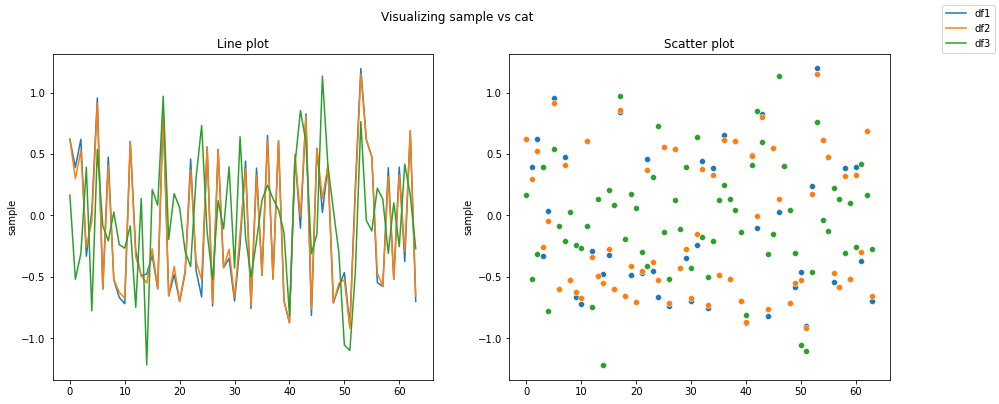

In [96]:
plot_activ(df=pd.DataFrame(dfb['sample']).T, df2=pd.DataFrame(dfb['new_value']).T, df3=pd.DataFrame(dfb['cat']).T)

We see on the visualization above that the second df (i.e. the new value) has became much closer

### Re-build the back of the model and make a prediction

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               multiple                  136       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  36        
                                                                 
 dense_2 (Dense)             multiple                  5         
                                                                 
Total params: 645,361
Trainable params: 645,361
Non-trai

Instead of re-building the model as we did to get activations of each layer, we want to build the part after the layer we are getting closer the activations of.

Thus, new computed activations become the inputs for the rest of the model.

In [98]:
rest_model = Sequential()
for i in range(layer_to_explore + 1, len(model.layers)):
    rest_model.add(model.layers[i])

rest_model.build(input_shape=model.layers[0].output_shape) #input_shape
rest_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                5184      
                                                                 
 dense (Dense)               multiple                  136       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  36        
                                                                 
 dense_2 (Dense)             multiple                  5         
                                                                 
Total params: 5,361
Trainable params: 5,361
Non-trainable params: 0
_________________________________________________________________


In [99]:
new_activations = dfb['new_value']
new_activations

neuron_1     0.620903
neuron_2     0.299903
neuron_3     0.526355
neuron_4    -0.258982
neuron_5    -0.045811
               ...   
neuron_60   -0.518064
neuron_61    0.328367
neuron_62      -0.295
neuron_63    0.688104
neuron_64   -0.656295
Name: new_value, Length: 64, dtype: object

In [100]:
new_shape = model.layers[layer_to_explore].output_shape[-1]

nas = np.asarray(new_activations).astype('float32').reshape(-1, 1, new_shape)
print(nas.shape)
print(nas)

(1, 1, 64)
[[[ 0.6209032   0.29990336  0.526355   -0.25898176 -0.04581054
    0.9133354  -0.5987414   0.4067991  -0.52142775 -0.62429035
   -0.6723551   0.6018282  -0.33579308 -0.4903867  -0.549531
   -0.27159438 -0.597572    0.8550677  -0.65402776 -0.41501194
   -0.69993633 -0.449317    0.37122148 -0.37503433 -0.52312726
    0.55718297 -0.7148259   0.53781354 -0.42460722 -0.2750784
   -0.6695244  -0.15129074  0.3806657  -0.7307672   0.32620025
   -0.48552293  0.6101613  -0.5180094   0.60706604 -0.69326806
   -0.8681211   0.48628354 -0.00727886  0.8031268  -0.76394534
    0.5456178   0.13648188  0.4044956  -0.71132505 -0.5521639
   -0.5229077  -0.9185802   0.17137147  1.1522686   0.61560464
    0.477533   -0.46836746 -0.57845837  0.3181693  -0.5180636
    0.32836738 -0.29500043  0.68810433 -0.656295  ]]]


In [101]:
rest_model.predict(nas)

1/1 [==============================] - 0s 439ms/step


array([[0.5676128]], dtype=float32)

## Testing an issue point

The main issue we could get is that we're taking the mean of the embedding to display the activations, so we saved it like that.
Now, we want to 'boost' the activations for the Embedding layer but we took the mean.

Let's see if the result from the mean and the original (not meaned) activations are really that different.

In [114]:
sample_index = sample.index[0]
sample_index

'http://dbpedia.org/resource/Pavel_Filonov'

In [119]:
sample_inputs = np.array([np.array(x) for x in wdf[wdf.index == sample_index].input])

sample_inputs

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3624, 3643,   19, 4961, 2289, 2032, 3040, 2357,   20,
          25,   19,  290,    1,    2, 

In [118]:
fp_model = Sequential()
fp_model.add(model.layers[0])
fp_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
Total params: 640,000
Trainable params: 640,000
Non-trainable params: 0
_________________________________________________________________


In [121]:
fp_sample_act = fp_model.predict(sample_inputs)

1/1 [==============================] - 0s 11ms/step


In [123]:
rest_model.predict(fp_sample_act)

1/1 [==============================] - 0s 253ms/step


array([[0.29722556]], dtype=float32)

So, for the original activations, we get **0.297**

In [129]:
sample_mean_act = np.array(df_act_sample).reshape(-1, 1, 64)

In [130]:
rest_model.predict(sample_mean_act)

1/1 [==============================] - 0s 12ms/step


array([[0.4754896]], dtype=float32)

THERE IS A BIG DIFFERENCE

That means, we must retrieve the original activations (without the mean) in order to boost these activations at the level of the Embedding layer because it seems that this is the layer which make the global decision for the output